In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('mobile_dataset.csv')

In [48]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [49]:
x = df.drop(columns = 'price_range')
y = df['price_range']

In [50]:
from sklearn.feature_selection import chi2 ,SelectKBest

In [51]:
select = SelectKBest(score_func=chi2 , k =10)

In [52]:
md = select.fit(x ,y )

In [53]:
scores = pd.DataFrame(md.scores_)

In [54]:
col = pd.DataFrame(x.columns)

In [57]:
df1 = pd.concat([scores ,col],axis =1)

In [59]:
df1.columns =['scores' ,'col']

In [60]:
df1

,scores,col
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [61]:
df1.nlargest(10 ,'scores')

,scores,col
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


In [63]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()

In [64]:
et.fit(x ,y)

ExtraTreesClassifier()

In [65]:
ser = pd.Series(et.feature_importances_ ,index = x.columns)

<AxesSubplot:>

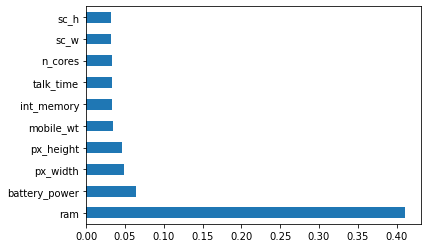

In [67]:
ser.nlargest(10).plot(kind ='barh')

In [68]:
from sklearn.feature_selection import mutual_info_classif
mf = mutual_info_classif(x ,y)

In [72]:
pd.Series(mf ,index = x.columns )

battery_power    0.024947
blue             0.000000
clock_speed      0.015501
dual_sim         0.000000
fc               0.000000
four_g           0.011455
int_memory       0.004612
m_dep            0.000000
mobile_wt        0.000000
n_cores          0.000000
pc               0.000000
px_height        0.024279
px_width         0.025773
ram              0.847867
sc_h             0.000000
sc_w             0.021240
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
wifi             0.000000
dtype: float64